In [1]:
%reset -f

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.optimize import minimize

np.set_printoptions(suppress=True)  #suppress scientific notation numpy
pd.set_option("display.max_columns",None) #show all columns

In [2]:
df1=pd.read_csv('dataset/tomato-province.csv')
#df_county1.drop(columns=['Province_number', 'County_number'])
#display(df_county1)

In [3]:

df2=df1.copy()
display(df2)
df2=df1[['Province','Farm_count','Yield1_kgha','Ecwat_dSm','Ecsoil_dSm','Farm_area_ha'
         ,'GD_days','Rain_Growth_mm','EffectiveRain_Growth_mm','IrrigWat_m3ha','Yield_tonha']].copy()
display(df2)


,Province,County,Farm_count,Yield_tonha,Yield1_kgha,Ecwat_dSm,Ecsoil_dSm,Farm_area_ha,GD_days,Irrig_depth_mm,Rain_Growth_mm,EffectiveRain_Growth_mm,IrrigWat_m3ha
0,Fars,Kazerun-Marvdasht-Sepidan,23,86.1,55950,0.75,1.52,2.50,138,21.0,68,40,10018
1,KermanSouth,RoudbarJonoub-Kahnouj-AnbarAbad,21,28.6,34495,1.42,1.68,2.70,156,14.0,222,167,5109
2,Hormozgan,Minab-Jask,12,52.0,38542,2.47,5.37,5.50,130,8.9,425,140,6157
3,Boushehr,Abdan-Bardkhoun-Kaki-Barazjan,24,48.9,52824,3.18,5.77,3.02,162,6.2,358,269,4648
4,KhorasanRazavi,Mashhad-Chenaran-TorbatJam,31,64.2,43000,1.62,1.08,8.52,130,50.7,40,30,11714
5,Qazvin,Qazvin-Takestan,16,59.4,54698,1.47,1.39,7.92,159,23.5,9,7,11129
6,Khuzestan,Dezful-Andimeshk-Shush-Gotvand,16,89.6,38714,1.28,2.08,3.50,153,16.6,622,214,5546
7,Golestan,Ramyan,8,71.0,43909,1.59,1.05,1.09,133,36.0,211,141,3752
8,Zanjan,Zanjan-Abhar,17,43.1,51475,1.02,1.58,4.18,152,20.8,24,18,8877
9,Hamedan,AsadAbad-Nahavand,8,62.2,42587,0.67,0.74,1.85,149,31.4,110,55,10255


,Province,Farm_count,Yield1_kgha,Ecwat_dSm,Ecsoil_dSm,Farm_area_ha,GD_days,Rain_Growth_mm,EffectiveRain_Growth_mm,IrrigWat_m3ha,Yield_tonha
0,Fars,23,55950,0.75,1.52,2.50,138,68,40,10018,86.1
1,KermanSouth,21,34495,1.42,1.68,2.70,156,222,167,5109,28.6
2,Hormozgan,12,38542,2.47,5.37,5.50,130,425,140,6157,52.0
3,Boushehr,24,52824,3.18,5.77,3.02,162,358,269,4648,48.9
4,KhorasanRazavi,31,43000,1.62,1.08,8.52,130,40,30,11714,64.2
5,Qazvin,16,54698,1.47,1.39,7.92,159,9,7,11129,59.4
6,Khuzestan,16,38714,1.28,2.08,3.50,153,622,214,5546,89.6
7,Golestan,8,43909,1.59,1.05,1.09,133,211,141,3752,71.0
8,Zanjan,17,51475,1.02,1.58,4.18,152,24,18,8877,43.1
9,Hamedan,8,42587,0.67,0.74,1.85,149,110,55,10255,62.2


In [4]:

x_ecwat = df2['Ecwat_dSm'].to_numpy()
x_gd  = df2['GD_days'].to_numpy()
x_rain = df2['EffectiveRain_Growth_mm'].to_numpy()
x_wat = df2['IrrigWat_m3ha'].to_numpy()
x_y1 = df2['Yield1_kgha'].to_numpy()

y= df2['Yield_tonha'].to_numpy()
N=len(y)
x=np.c_[x_ecwat,x_gd,x_rain,x_wat,x_y1]
province=df2['Province'].astype(str).values.tolist()

[ 1.544 -0.747  0.477  0.279  0.252 -1.279  0.     0.     0.     0.
  0.     0.     0.   ]


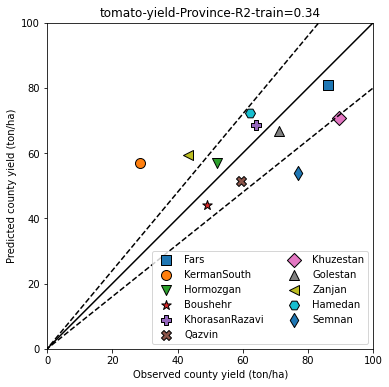

In [5]:

ind=np.random.choice(N,N)<N*0.7

ind=y<1000


a = [1.358, 0,0,0,0,0,0,0,0,0,0,0,0]

def func1(a,x): 
    x_ecwat=x[:,0]
    x_gd=x[:,1]
    x_rain=x[:,2]
    x_wat=x[:,3]
    x_y1=x[:,4]


    return 90*(a[0]+a[1]*x_ecwat/4+a[2]*x_rain/300+a[3]*x_wat/12000+a[4]*x_y1/60000+a[5]*x_gd/170)




func2= lambda a: np.dot(y-func1(a,x),y-func1(a,x))/50**2


res = minimize(func2,a)
a=np.round(res.x,3)

print(a)

y1=90*(1.544+-0.747*x_ecwat/4+0.477*x_rain/300+0.279*x_wat/12000+0.252*x_y1/60000+-1.279*x_gd/170)

y_hat_lin1=func1(a,x)
y_hat_lin1=y1

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(6, 6)

markers_=['s','o','v','*','P','X','D','^','<','H','d','P','X','D']

for i in range(N):
    m=ax.scatter(y[i], y_hat_lin1[i],marker=markers_[i],label=province[i],s=100,edgecolor='k')

ax.legend(loc='lower right',ncol=2)

ax.plot(np.array([0,10000]),np.array([0,10000]), 'k-')
ax.plot(np.array([10000,0,10000]),np.array([12000,0,8000]), 'k--')
ax.set_xlabel('Observed county yield (ton/ha)')
ax.set_ylabel('Predicted county yield (ton/ha)')
ax.set_xlim(left=0,right=100)
ax.set_ylim(bottom=0,top=100)
ax.set_aspect('equal')
#ax.set_title("Linear Regression-R2="+str(np.round(r2_score(y,y_hat_lin1),3)))
R2=np.round(r2_score(y,y_hat_lin1),3)

ax.set_title("tomato-yield-Province-R2-train="+str(R2))
fig.savefig('fig/tomato_province_yield_fusion.png', dpi=300)




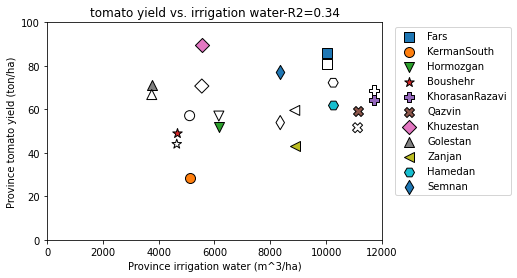

In [6]:
for i in range(N):
    plt.scatter(x_wat[i], y[i],marker=markers_[i],label=province[i],s=100,edgecolor='k')
    plt.scatter(x_wat[i], y_hat_lin1[i],marker=markers_[i],s=100,facecolor='none',edgecolor='k')

plt.xlabel('Province irrigation water (m^3/ha)')
plt.ylabel('Province tomato yield (ton/ha)')
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', ncol=1)
plt.xlim(left=0,right=12000)
plt.ylim(bottom=0,top=100)

plt.title("tomato yield vs. irrigation water-R2="+str(R2))
fig.savefig('fig/tomato_province_yield_vs_irrigwat.png', dpi=300)